# Regularization Techniques

This document presents an integrated and progressively developed explanation of
regularization and normalization techniques in machine learning and deep learning,
combining both theoretical foundations and a practical implementation in PyTorch. The
central example consists of a binary classification problem solved with a small neural
network trained on a synthetic dataset with circular structure. The code illustrates how
to implement and apply L1 (Lasso) and L2 (Ridge) regularization in practice, while the
theoretical sections place these techniques in the broader context of linear regression,
overfitting control, and model stability.

The exposition follows a linear and didactic structure. It starts from the analytical
solution of linear regression using the Moore–Penrose pseudoinverse and motivates the
need for regularization from a numerical stability and generalization perspective.
Subsequently, it formalizes L1 and L2 regularization, discusses other common
regularization strategies (dropout, data augmentation, early stopping, input
normalization), and explains activation normalization methods (Batch Normalization and
Layer Normalization). Finally, it connects this theory with a complete PyTorch
implementation, highlighting how the abstract concepts of Ridge and Lasso regularization
translate into concrete training code.

The text is intended to be accessible to readers with basic knowledge of linear algebra,
probability, and Python programming, but it maintains a formal and technically precise
tone.

## Linear Regression and the Moore–Penrose Pseudoinverse

In the context of linear regression, the objective is to estimate a parameter vector
$\mathbf{w}$ that best fits a set of training examples. Given a design matrix
$\mathbf{X} \in \mathbb{R}^{N \times n}$, where each row represents an example and each
column a feature, and a target vector $\mathbf{y} \in \mathbb{R}^N$, the classical
least-squares formulation seeks to minimize the mean squared error between the
predictions $\hat{\mathbf{y}} = \mathbf{X}\mathbf{w}$ and the true targets $\mathbf{y}$.

In the simplest case, when the matrix $\mathbf{X}^\top \mathbf{X}$ is invertible and
well-conditioned, it is possible to obtain an analytical solution for the model weights
using the Moore–Penrose pseudoinverse. The closed-form expression for the optimal weights
in the least-squares sense is given by:

$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.
$$

This expression corresponds to the normal equations and provides a direct solution
without iterative optimization. However, in many practical situations the matrix
$\mathbf{X}^\top \mathbf{X}$ is not well-behaved. When it is nearly singular, that is,
when some of its eigenvalues are very small or close to zero, the inverse
$(\mathbf{X}^\top \mathbf{X})^{-1}$ becomes numerically unstable. Small perturbations in
the data can then cause large variations in the estimated parameters $\mathbf{w}$.

This phenomenon has two main consequences. On the one hand, it produces highly sensitive
models whose predictions change drastically in response to small input variations. On the
other hand, it favours overfitting, that is, the model adapts too closely to the specific
noise and peculiarities of the training data, displaying poor generalization when
evaluated on new, unseen examples. To alleviate these issues, it is common to introduce
regularization terms into the cost function.

## Regularization in Linear Models

Regularization introduces additional terms into the loss function that penalize
excessively large parameter values. From a statistical viewpoint, regularization reduces
the variance of the estimator by constraining the hypothesis space. From a numerical
viewpoint, it improves the conditioning of the optimization problem and stabilizes the
solution.

In the context of linear regression, the standard mean squared error loss is given by:

$$
\mathcal{L}_{\text{MSE}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2.
$$

Regularization augments this objective with a penalty on the weights. The two most widely
used regularization schemes are L2 regularization (Ridge Regression) and L1
regularization (Lasso Regression).

### L2 Regularization (Ridge Regression)

L2 regularization adds a penalty term proportional to the square of the Euclidean norm of
the weights. The Ridge loss function takes the form:

$$
\mathcal{L}_{\text{Ridge}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \|\mathbf{w}\|_2^2,
$$

where $\|\mathbf{w}\|_2^2 = \sum_j w_j^2$ and $\lambda \ge 0$ is a hyperparameter that
controls the intensity of the penalization. A larger $\lambda$ enforces a stronger
restriction on the magnitude of the weights.

From a geometric perspective, the L2 penalty discourages solutions with large
coefficients and favours weight vectors with smaller and more evenly distributed
components. This behaviour leads to smoother and more stable models that are less
sensitive to noise. In terms of generalization, L2 regularization reduces overfitting by
penalizing complex models with large parameters. In the context of gradient-based
optimization, this penalty manifests as a shrinkage of the weights towards zero at each
update, a phenomenon commonly known as weight decay.

In addition, L2 regularization improves the conditioning of the matrix
$\mathbf{X}^\top \mathbf{X}$ by effectively adding $\lambda \mathbf{I}$ to it in the
normal equations, which mitigates the problems associated with small eigenvalues. The
resulting solution is more robust to perturbations in the data.

### L1 Regularization (Lasso Regression)

L1 regularization, on the other hand, adds a penalty term based on the sum of the
absolute values of the weights. The Lasso loss function is defined as:

$$
\mathcal{L}_{\text{Lasso}} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \|\mathbf{w}\|_1,
$$

where $\|\mathbf{w}\|_1 = \sum_j |w_j|$. As in the Ridge case, $\lambda$ determines the
strength of the regularization.

The key difference between L1 and L2 regularization lies in the geometry of the penalty.
The L1 norm induces sparsity: it tends to drive some coefficients exactly to zero. This
effect leads to models in which only a subset of features remains active, effectively
performing implicit feature selection. As a result, L1-regularized models are often
simpler and more interpretable, as they rely on fewer variables.

However, in optimization problems that are already non-convex due to the presence of deep
neural architectures, the interaction of the L1 penalty with gradient descent can be less
straightforward than in linear regression. The absolute value introduces
non-differentiability at zero, and although subgradient methods and approximate
techniques are commonly used, L1 regularization is less widespread in deep learning than
L2 regularization and other regularization strategies.

## Regularization and Normalization

In deep learning, the capacity of neural networks to approximate highly complex functions
substantially increases the risk of overfitting. Regularization and normalization
techniques play a fundamental role in controlling this capacity, improving
generalization, and stabilizing training dynamics.

Regularization, in this broader sense, encompasses any technique designed to limit the
model’s dependence on the specifics of the training data, promoting representations that
remain robust when confronted with unseen examples. While L1 and L2 regularization
continue to be important, deep learning also includes complementary strategies such as
dropout, data augmentation, early stopping, and input normalization.

### Common Regularization Techniques

Several regularization techniques are widely used in practical deep learning systems.

L2 regularization (Ridge) is implemented in neural networks as weight decay, typically
through a term added to the loss or directly integrated into the optimizer. It penalizes
the squared magnitude of the weights, preventing them from growing excessively and
favouring smoother, more generalizable solutions. It stabilizes optimization and reduces
the variance of the learned parameters.

L1 regularization (Lasso) penalizes the absolute magnitude of the weights, driving many
of them towards zero. In neural networks, this induces sparsity in the parameters and can
be used as a form of implicit feature selection or connection pruning. Nonetheless, in
deep models it is less common than L2 and often combined with other regularization
methods.

Dropout randomly deactivates a subset of neurons during training. At each forward pass, a
random binary mask is applied to the activations of selected layers, forcing the network
to distribute information and avoid strong co-adaptations between units. This mechanism
acts as an ensemble of sub-models that share parameters and increases robustness by
preventing the model from relying too heavily on any particular path through the network.

However, dropout introduces stochasticity into the outputs. For a fixed input, two
different forward passes can produce different predictions due to different sampled
masks, and some mask realizations may be suboptimal (for example, with an unusually large
number of deactivated units). After training, a deterministic behaviour is usually
desired for inference. One strategy consists of estimating the expected output via Monte
Carlo sampling, that is, performing multiple stochastic forward passes and averaging the
results. This approach not only stabilizes predictions but also yields an empirical
measure of predictive uncertainty. Nevertheless, it increases inference cost. A more
common and efficient alternative is to replace the stochastic dropout operation with a
deterministic scaling of the activations during inference, using the expected value of
the random mask. Most deep learning libraries implement this approximation automatically
when switching the model from training mode to evaluation mode.

Data augmentation generates additional training examples from existing data through
label-preserving transformations, such as rotations, translations, scaling, cropping, or
changes in brightness and contrast in the case of images. This technique increases the
diversity of the training set and encourages the model to learn features invariant to
these transformations. In doing so, it reduces overfitting and improves generalization,
especially when the original dataset is relatively small.

Early stopping monitors the model’s performance on a validation set and stops training
when the validation error ceases to improve or begins to deteriorate. This technique
prevents the network from continuing to adapt to noise and idiosyncrasies in the training
set beyond the point of minimal validation error. It can be interpreted as a form of
implicit regularization because it limits the effective capacity of the model by
terminating training early.

Input normalization preprocesses the features so that they share similar scales and are
centred around zero, for example by subtracting the mean and dividing by the standard
deviation of each feature. This operation improves numerical stability, accelerates
convergence in gradient-based optimization, and prevents certain features with large
magnitudes from dominating the learning process.

### Activation Normalization: Batch and Layer Normalization

In addition to regularizing the parameters, it is crucial to control the distribution of
activations within a network. During training, the internal representations produced by
intermediate layers can change significantly as earlier layers are updated, a phenomenon
known as internal covariate shift. This variability complicates optimization, as each
layer must constantly adapt to shifting input distributions.

Activation normalization techniques address this issue by enforcing more stable and
balanced distributions of activations across the network, thereby facilitating training
and enabling the use of higher learning rates.

Batch Normalization normalizes the activations of each layer using the mean and variance
computed over the examples in a mini-batch. For each feature channel, it estimates the
batch mean and variance, subtracts the mean from the activations, and divides by the
standard deviation. Subsequently, it applies learnable scaling and shifting parameters
that allow the network to recover any necessary distribution. Batch Normalization reduces
internal covariate shift, speeds up convergence, and often reduces sensitivity to
hyperparameters. However, its performance depends on the mini-batch size and composition.
It can be less effective or unstable when batches are very small or when the data
distribution varies strongly between batches, as in certain sequence modelling or
streaming scenarios.

Layer Normalization, in contrast, performs normalization at the level of individual
samples rather than across the batch. It computes the mean and variance over the features
of each sample and then normalizes and re-scales the activations. This property makes
Layer Normalization especially suitable for architectures such as transformers and
recurrent networks, as well as for distributed training settings, because it does not
require sharing statistics across different examples in a mini-batch. It provides more
consistent normalization in cases where batch composition can fluctuate substantially or
where very small batch sizes are used.

Both Batch Normalization and Layer Normalization can be interpreted as mechanisms that
stabilize and regularize the training process by controlling the distribution of
activations, although they are not regularization techniques in the same strict sense as
L1 or L2 penalties on the parameters.

## Binary Classification with Regularization

To make the preceding concepts concrete, this section describes a complete implementation
of a binary classification task using PyTorch, in which L1 and L2 regularization are
explicitly incorporated into the training process. Although the problem is formulated as
classification rather than regression, the underlying idea of penalizing parameter norms
to improve generalization is the same as in Ridge and Lasso regression.

The implementation starts by importing the necessary libraries for numerical computation,
visualization, data generation, and model definition:

In [1]:
# Standard libraries
import math

# 3pps
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn

The `math` module provides mathematical utilities such as `ceil`, which is used to
compute the number of mini-batches. The `matplotlib.pyplot` and `numpy` libraries are
used for data visualization and numerical operations, respectively. PyTorch (`torch`,
`torch.nn`) supplies the infrastructure for defining and training neural networks.
Finally, scikit-learn functions `make_circles` and `train_test_split` are used to
generate a synthetic dataset and partition it into training and test sets.

The model is a simple feed-forward neural network designed for binary classification with
two-dimensional inputs:

In [2]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(2, 16), nn.GELU(), nn.Linear(16, 1))

    def forward(self, x):
        return self.model(x)

The architecture comprises an input layer, a hidden layer, and an output layer. The input
layer (`nn.Linear(2, 16)`) maps two-dimensional feature vectors to a 16-dimensional
hidden representation. This choice is consistent with the synthetic dataset, where each
example has two features. A GELU (Gaussian Error Linear Unit) activation introduces
non-linearity between the hidden layer and the output layer. This non-linear
transformation allows the network to learn complex decision boundaries that cannot be
captured by linear models.

The output layer (`nn.Linear(16, 1)`) produces a single scalar per input sample, known as
a logit. In binary classification, logits are typically transformed into probabilities
using the sigmoid function. In this example, the logits are directly passed to a loss
function (`BCEWithLogitsLoss`) that internally combines the sigmoid operation with binary
cross-entropy in a numerically stable manner.

The `forward` method defines the computation performed at each call. The input tensor `x`
has shape $(N, 2)$, where $N$ is the batch size, and the output tensor has shape
$(N, 1)$. This convention aligns with the shape of the label tensors used during
training.

The dataset consists of two concentric circles, a classical example of a non-linearly
separable problem:

In [3]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

The function `make_circles` generates $n_{\text{samples}}$ two-dimensional points
arranged in two circular clusters. The `noise` parameter introduces Gaussian noise into
the data, making the classification task more realistic and preventing perfect
separability. The `random_state` parameter fixes the random seed, ensuring reproducible
data generation.

The feature matrix `X` has shape $(1000, 2)$ and contains the coordinates of the points,
while the label vector `y` has shape $(1000,)$ and encodes the class of each point (0 or
1). A scatter plot allows visual inspection of the data:

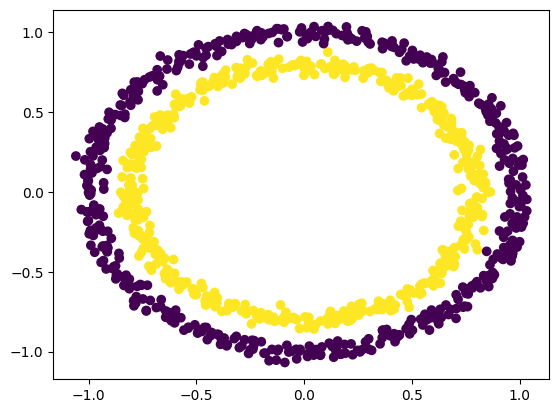

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In this plot, points are coloured according to their class, and the concentric circular
structure becomes evident. Because the classes are not linearly separable, a linear
classifier cannot find a straight decision boundary that separates them, which motivates
the use of a neural network with a non-linear hidden layer.

To evaluate the generalization performance of the model, the dataset is split into
training and test subsets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

The argument `test_size=0.3` indicates that 30% of the data is reserved for testing,
while 70% is used for training. The parameter `stratify=y` ensures that both subsets
preserve the original class distribution, which is important to avoid biases in the
evaluation. The `random_state` parameter ensures that the split is reproducible.

Since PyTorch models operate on tensors, the NumPy arrays are converted to `torch.Tensor`
objects with appropriate data types:

In [6]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).unsqueeze(1)
y_test = torch.from_numpy(y_test.astype(np.float32)).unsqueeze(1)

The features are cast to 32-bit floating-point numbers, the usual precision for neural
network training. The labels are also converted to `float32` and reshaped from shape
$(N,)$ to $(N, 1)$ using `unsqueeze(1)`, so that their shape matches the model outputs.
This alignment simplifies the use of scalar-valued loss functions that operate on tensors
of identical shapes.

It is common to verify the ranges and types of the label tensors:

In [7]:
print(y_train.min(), y_train.max(), y_train.dtype)
print(y_test.min(), y_test.max(), y_test.dtype)

tensor(0.) tensor(1.) torch.float32
tensor(0.) tensor(1.) torch.float32


These checks confirm that labels are correctly encoded (typically 0 and 1) and use a
floating-point type, as required by `BCEWithLogitsLoss`.

Separate scatter plots of the training and test sets allow verification that both subsets
are representative of the overall data distribution and preserve the circular structure.

To mirror Ridge and Lasso regularization within the neural network setting, two functions
are defined that augment the loss with L2 and L1 penalties applied to the model
parameters.

L2 regularization (Ridge) is implemented as follows:

In [8]:
def ridge_regularization(model, loss, alpha):
    l2_penalty = 0.0
    for name, param in model.named_parameters():
        if "bias" not in name:
            l2_penalty += torch.sum(param**2)
    return loss + alpha * l2_penalty

This function iterates over the named parameters of the model using
`model.named_parameters()`. For each parameter whose name does not contain the substring
`'bias'`, it adds the sum of the squared values to `l2_penalty`. Bias terms are typically
excluded from regularization, because penalizing them rarely improves generalization and
may introduce unnecessary constraints. The function returns the original loss plus
`alpha` times the accumulated penalty. The coefficient `alpha` plays the role of
$\lambda$ in the theoretical expressions, controlling the strength of the L2
regularization.

L1 regularization (Lasso) is implemented analogously:

In [9]:
def lasso_regularization(model, loss, alpha):
    l1_penalty = 0.0
    for name, param in model.named_parameters():
        if "bias" not in name:
            l1_penalty += torch.sum(torch.abs(param))
    return loss + alpha * l1_penalty

Here, the penalty is the sum of the absolute values of the weights (excluding biases). As
before, the final loss is the sum of the original loss and the scaled penalty. In theory,
this L1 term encourages sparsity in the weights, although in small networks with dense
fully connected layers, the degree of sparsity may be modest compared to linear models
with large numbers of features.

Conceptually, these functions transfer the idea of Ridge and Lasso from the linear
regression setting (where they are applied to $\mathbf{w}$) to a neural network setting
(where they are applied to all or part of the learned parameters).

The complete training procedure is encapsulated in the `train_model` function:

In [10]:
def train_model(
    model, optimizer, loss_fn, reg_fn=None, alpha=0.0, num_epochs=20, batch_size=32
):

    num_batches = math.ceil(len(X_train) / batch_size)
    num_batches_test = math.ceil(len(X_test) / batch_size)

    for epoch in range(num_epochs):
        model.train()
        train_losses, train_accs = [], []

        for i in range(num_batches):
            X_batch = X_train[i * batch_size : (i + 1) * batch_size]
            y_batch = y_train[i * batch_size : (i + 1) * batch_size]

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)

            if reg_fn is not None:
                loss = reg_fn(model, loss, alpha)

            loss.backward()
            optimizer.step()

            preds = (torch.sigmoid(logits) >= 0.5).float()
            acc = (preds == y_batch).float().mean().item() * 100

            train_losses.append(loss.item())
            train_accs.append(acc)

        model.eval()
        test_losses, test_accs = [], []

        with torch.inference_mode():
            for i in range(num_batches_test):
                X_batch = X_test[i * batch_size : (i + 1) * batch_size]
                y_batch = y_test[i * batch_size : (i + 1) * batch_size]

                logits = model(X_batch)
                loss = loss_fn(logits, y_batch)

                preds = (torch.sigmoid(logits) >= 0.5).float()
                acc = (preds == y_batch).float().mean().item() * 100

                test_losses.append(loss.item())
                test_accs.append(acc)

        print(
            f"Epoch {epoch+1:02d} | "
            f"Train Loss: {np.mean(train_losses):.4f} | "
            f"Test Loss: {np.mean(test_losses):.4f} | "
            f"Train Acc: {np.mean(train_accs):.2f}% | "
            f"Test Acc: {np.mean(test_accs):.2f}%"
        )

The function receives the model, an optimizer (for example, Adam), a loss function (here,
`BCEWithLogitsLoss`), an optional regularization function (`reg_fn`), the corresponding
regularization coefficient `alpha`, and the training hyperparameters `num_epochs` and
`batch_size`.

The training loop performs the following tasks. First, it computes the number of
mini-batches for both training and test sets using `math.ceil`. For each epoch, the model
is set to training mode with `model.train()`, and two lists are initialized to store
batch-wise training losses and accuracies.

The training dataset is then processed in mini-batches. For each batch, slices of
`X_train` and `y_train` are selected. The gradients are reset via
`optimizer.zero_grad()`, and the model produces logits for the batch. The primary loss is
computed by applying `loss_fn` to the logits and labels. If a regularization function has
been provided, the loss is augmented using `reg_fn(model, loss, alpha)`, effectively
adding L1 or L2 penalties to the objective.

After computing the final loss, `loss.backward()` is called to perform backpropagation,
computing gradients with respect to all parameters. The optimizer then updates the model
parameters via `optimizer.step()`.

Accuracy for the batch is computed as the percentage of correctly classified examples.
Both the loss and accuracy values are accumulated for later averaging.

Once all training batches for the epoch have been processed, the model is switched to
evaluation mode using `model.eval()`. In evaluation mode, certain layers such as dropout
or batch normalization (if present) adjust their behaviour accordingly. The evaluation on
the test set is carried out within a `with torch.inference_mode():` context, which
disables gradient calculation, reducing memory consumption and computation time. The test
data is also processed in mini-batches, and for each batch the loss and accuracy are
computed in the same manner as during training, but without performing backpropagation or
parameter updates.

At the end of each epoch, the function prints a summary that includes the average
training loss, test loss, training accuracy, and test accuracy. This information allows
one to assess both how well the model fits the training data and how well it generalizes
to unseen examples. The presence or absence of regularization will influence these
metrics, typically reducing overfitting by sacrificing a small amount of training
performance in exchange for better test performance.

It is worth noting that, for simplicity, this implementation accesses `X_train`,
`y_train`, `X_test`, and `y_test` as global variables. In more modular designs, data
loaders (`torch.utils.data.DataLoader`) are usually employed to encapsulate batching,
shuffling, and parallel loading of data.

Finally, the script demonstrates how to train the same model under two different
regularization regimes.

Training with L2 (Ridge) regularization is configured as follows:

In [11]:
model = BinaryClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-2)
loss_fn = nn.BCEWithLogitsLoss()

train_model(model, optimizer, loss_fn, reg_fn=ridge_regularization, alpha=0.001)

Epoch 01 | Train Loss: 0.6990 | Test Loss: 0.6865 | Train Acc: 50.28% | Test Acc: 62.60%
Epoch 02 | Train Loss: 0.6864 | Test Loss: 0.6729 | Train Acc: 55.40% | Test Acc: 53.33%
Epoch 03 | Train Loss: 0.6687 | Test Loss: 0.6354 | Train Acc: 61.47% | Test Acc: 62.71%
Epoch 04 | Train Loss: 0.6204 | Test Loss: 0.5557 | Train Acc: 74.23% | Test Acc: 81.67%
Epoch 05 | Train Loss: 0.5572 | Test Loss: 0.4823 | Train Acc: 85.23% | Test Acc: 89.38%
Epoch 06 | Train Loss: 0.4898 | Test Loss: 0.3922 | Train Acc: 89.22% | Test Acc: 94.69%
Epoch 07 | Train Loss: 0.4365 | Test Loss: 0.3231 | Train Acc: 91.82% | Test Acc: 98.44%
Epoch 08 | Train Loss: 0.3895 | Test Loss: 0.2674 | Train Acc: 95.31% | Test Acc: 98.75%
Epoch 09 | Train Loss: 0.3498 | Test Loss: 0.2241 | Train Acc: 97.30% | Test Acc: 99.69%
Epoch 10 | Train Loss: 0.3191 | Test Loss: 0.1901 | Train Acc: 99.15% | Test Acc: 100.00%
Epoch 11 | Train Loss: 0.2970 | Test Loss: 0.1636 | Train Acc: 99.72% | Test Acc: 100.00%
Epoch 12 | Train Lo

A fresh instance of `BinaryClassifier` is created, and the Adam optimizer is initialized
with a relatively high learning rate of $3 \times 10^{-2}$. The `BCEWithLogitsLoss` loss
function is used because the model outputs logits. The training loop is invoked with
`ridge_regularization` as the regularization function, and the regularization coefficient
is set to `alpha = 0.001`. During training, this configuration adds an L2 penalty on the
weights to the loss at each parameter update, analogous to Ridge regression. One
typically observes smoother weight trajectories and improved generalization compared to
an unregularized model.

The model is then re-trained from scratch with L1 (Lasso) regularization:

In [12]:
model = BinaryClassifier()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-2)

train_model(model, optimizer, loss_fn, reg_fn=lasso_regularization, alpha=0.001)

Epoch 01 | Train Loss: 0.7037 | Test Loss: 0.6804 | Train Acc: 50.77% | Test Acc: 54.38%
Epoch 02 | Train Loss: 0.6823 | Test Loss: 0.6571 | Train Acc: 60.96% | Test Acc: 59.58%
Epoch 03 | Train Loss: 0.6544 | Test Loss: 0.6137 | Train Acc: 61.00% | Test Acc: 69.17%
Epoch 04 | Train Loss: 0.6125 | Test Loss: 0.5528 | Train Acc: 73.88% | Test Acc: 85.31%
Epoch 05 | Train Loss: 0.5567 | Test Loss: 0.4931 | Train Acc: 86.42% | Test Acc: 88.44%
Epoch 06 | Train Loss: 0.4943 | Test Loss: 0.4228 | Train Acc: 90.52% | Test Acc: 93.44%
Epoch 07 | Train Loss: 0.4399 | Test Loss: 0.3667 | Train Acc: 92.72% | Test Acc: 96.25%
Epoch 08 | Train Loss: 0.3956 | Test Loss: 0.3238 | Train Acc: 94.03% | Test Acc: 97.81%
Epoch 09 | Train Loss: 0.3578 | Test Loss: 0.2846 | Train Acc: 96.02% | Test Acc: 97.81%
Epoch 10 | Train Loss: 0.3244 | Test Loss: 0.2513 | Train Acc: 97.44% | Test Acc: 98.75%
Epoch 11 | Train Loss: 0.2956 | Test Loss: 0.2241 | Train Acc: 98.44% | Test Acc: 99.06%
Epoch 12 | Train Loss

The reinitialization step ensures that both experiments start from comparable initial
conditions, making the comparison between L2 and L1 regularization more meaningful. The
optimizer and loss function remain the same, but the regularization function is now
`lasso_regularization`. L1 regularization tends to promote sparsity in the parameter
space, potentially zeroing out some weights. In small networks, this effect may be less
visually apparent than in large linear models, but it still encourages simpler solutions.

By comparing the printed training and test losses and accuracies for both configurations,
one can empirically observe the influence of L2 and L1 regularization on the learning
dynamics and generalization performance of the model. In particular, it is often the case
that L2 regularization yields smooth and stable decision boundaries, while L1
regularization, when appropriately tuned, can lead to slightly more compact or sparse
parameter configurations.